In [25]:
import sys
from pathlib import Path

sys.path.append(r"/home/maxim-shibanov/Projects_Py/Risk-and-return-prediction-with-LLM/src")

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import json
from textwrap import dedent
import matplotlib.lines as mlines
from linearmodels.panel import PanelOLS
from io import StringIO
from sklearn.preprocessing import StandardScaler

from data_analysis.data_fetcher.data_fetcher_class import DataFetcher
from data_collection.consts import  DB_PARAMS

In [26]:
fetcher = DataFetcher(
    db_params=DB_PARAMS,
    reports_table="reports",
    targets_table="targets_yf",
)

Available regressors:
 - avg_default_verbolizer
 - avg_shrink_verbolizer
 - doc_len
 - eps_surprise
 - f_size
 - full_list_default_verbolizer
 - full_list_shrink_verbolizer
 - hv_orig_score
 - lm_orig_score
 - max_abs_default
 - max_abs_shrink
 - max_default_verbolizer
 - max_shrink_verbolizer
 - md_hv1
 - md_hv2
 - md_hv3
 - md_lm1
 - md_lm2
 - md_lm3
 - min_default_verbolizer
 - min_shrink_verbolizer
 - stretch_default
 - stretch_shrink
Available sectors:
 - Technology (92)
 - Industrials (86)
 - Financial Services (85)
 - Healthcare (66)
 - Consumer Cyclical (58)
 - Consumer Defensive (40)
 - Real Estate (32)
 - Utilities (32)
 - Energy (30)
 - Basic Materials (23)
 - Communication Services (22)


/home/maxim-shibanov/Projects_Py/Risk-and-return-prediction-with-LLM/src/data_analysis/data_fetcher/data_fetcher_class.py:111: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)
/home/maxim-shibanov/Projects_Py/Risk-and-return-prediction-with-LLM/src/data_analysis/data_fetcher/data_fetcher_class.py:92: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


In [27]:
df = fetcher.fetch_data(
    regressors=[
    'hv_orig_score', 
    "md_hv1", 
    "md_hv2", 
    'md_hv3', 
    'lm_orig_score', 
    'md_lm1', 
    'md_lm2', 
    'md_lm3',
    'eps_surprise',
    'f_size',
    'doc_len'
    
    ],
    prepare_fixed_effects=True,
    )

/home/maxim-shibanov/Projects_Py/Risk-and-return-prediction-with-LLM/src/data_analysis/data_fetcher/data_fetcher_class.py:130: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)
/home/maxim-shibanov/Projects_Py/Risk-and-return-prediction-with-LLM/src/data_analysis/data_fetcher/data_fetcher_class.py:161: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return pd.read_sql_query(query, conn)
/home/maxim-shibanov/Projects_Py/Risk-and-return-prediction-with-LLM/src/data_analysis/data_fetcher/data_fetcher_class.py:169: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBA

In [28]:
df.isna().sum()

report_type          0
hv_orig_score        0
md_hv1               0
md_hv2               0
md_hv3               0
lm_orig_score        0
md_lm1               0
md_lm2               0
md_lm3               0
eps_surprise         0
f_size               0
doc_len              0
two_day_r          481
three_day_r          0
four_day_r           0
five_day_r           0
six_day_r            0
seven_day_r          0
full_q_r           496
two_day_e_r        481
three_day_e_r        0
four_day_e_r         0
five_day_e_r         0
six_day_e_r          0
seven_day_e_r        0
full_q_e_r         496
two_day_abn_r        0
three_day_abn_r      0
four_day_abn_r       0
five_day_abn_r       0
six_day_abn_r        0
seven_day_abn_r      0
full_q_abn_r       496
two_day_r_vol      317
three_day_r_vol    317
four_day_r_vol     317
five_day_r_vol     317
six_day_r_vol      317
seven_day_r_vol    317
full_q_r_vol       803
dtype: int64

In [29]:
df['f_size']

company  date  
A        2018.1    2.056938e+10
         2018.2    1.874173e+10
         2018.3    2.040719e+10
         2018.4    1.982101e+10
         2019.1    2.420927e+10
                       ...     
ZTS      2023.4    7.268577e+10
         2024.1    8.307353e+10
         2024.2    7.546163e+10
         2024.3    8.380998e+10
         2024.4    8.190785e+10
Name: f_size, Length: 13285, dtype: float64

In [30]:
df.columns

Index(['report_type', 'hv_orig_score', 'md_hv1', 'md_hv2', 'md_hv3',
       'lm_orig_score', 'md_lm1', 'md_lm2', 'md_lm3', 'eps_surprise', 'f_size',
       'doc_len', 'two_day_r', 'three_day_r', 'four_day_r', 'five_day_r',
       'six_day_r', 'seven_day_r', 'full_q_r', 'two_day_e_r', 'three_day_e_r',
       'four_day_e_r', 'five_day_e_r', 'six_day_e_r', 'seven_day_e_r',
       'full_q_e_r', 'two_day_abn_r', 'three_day_abn_r', 'four_day_abn_r',
       'five_day_abn_r', 'six_day_abn_r', 'seven_day_abn_r', 'full_q_abn_r',
       'two_day_r_vol', 'three_day_r_vol', 'four_day_r_vol', 'five_day_r_vol',
       'six_day_r_vol', 'seven_day_r_vol', 'full_q_r_vol'],
      dtype='object')

In [31]:
df.loc[('A')]['f_size']


date
2018.1    2.056938e+10
2018.2    1.874173e+10
2018.3    2.040719e+10
2018.4    1.982101e+10
2019.1    2.420927e+10
2019.2    2.031586e+10
2019.3    2.094021e+10
2019.4    2.512938e+10
2020.1    2.398432e+10
2020.2    2.684036e+10
2020.3    3.020445e+10
2020.4    3.552999e+10
2021.1    3.662425e+10
2021.2    4.053515e+10
2021.3    5.178092e+10
2021.4    4.463783e+10
2022.1    4.023713e+10
2022.2    3.730145e+10
2022.3    3.742646e+10
2022.4    4.365490e+10
2023.1    4.187326e+10
2023.2    3.500731e+10
2023.3    3.497504e+10
2023.4    3.993487e+10
2024.1    4.192006e+10
2024.2    3.805422e+10
2024.3    4.086595e+10
2024.4    3.826322e+10
Name: f_size, dtype: float64

In [32]:
class FEModeler:
    """
    A class to run panel fixed effects regressions using PanelOLS
    and extract key parameter statistics for a specified regressor.

    Attributes:
        df: The input panel data.
        var_names: Column names of the input DataFrame.
        params_dict: Dictionary storing regression parameters for each independent variable.
    """

    def __init__(self, df: pd.DataFrame, scale: bool = False, scale_glob: bool = False):
        """
        Initialize the FEModeler with panel data.

        Args:
            df: Panel DataFrame with MultiIndex (entity, time).
            scale: Whether to standardize the regressors.
        """
        self.original_df = df.copy()
        self.df = df.copy()
        self.var_names = df.columns
        self.params_dict = {}
        self.scale = scale

        if scale:
            self._scale_regressors()   
        elif scale_glob:
            self._scale_regressors_global_std()

    def _scale_regressors(self):
        """
        Standardize regressors: columns 1 to 8 (your x variables), plus control variables eps_surprise, f_size.
        Scaling is done entity-wise (within-entity).
        """
        x_cols = list(self.df.columns[1:9]) + ['eps_surprise', 'f_size']
        scaler = StandardScaler()

        # Scale within each entity group
        for entity in self.df.index.get_level_values(0).unique():
            entity_mask = self.df.index.get_level_values(0) == entity
            sub_df = self.df.loc[entity_mask, x_cols]
            if sub_df.shape[0] < 2:
                continue
            self.df.loc[entity_mask, x_cols] = scaler.fit_transform(sub_df)
    
    def _scale_regressors_global_std(self):
        """
        Divide each regressor column by its overall (global) standard deviation.
        No demeaning, no within-entity transformations.
        """
        x_cols = self.df.columns[1:9].tolist() + ['eps_surprise', 'f_size']

        # population s.d. (ddof=0).  Use ddof=1 if you prefer the sample s.d.
        scale_factors = self.df[x_cols].std(ddof=0)

        # save for later if you want to back-transform coefficients
        self.scale_factors_ = scale_factors

        # broadcast division
        self.df[x_cols] = self.df[x_cols] / scale_factors



    @staticmethod
    def extract_params(summary, regressor_name: str) -> pd.Series:
        """
        Extract parameter statistics for a given regressor from the regression summary.

        Args:
            summary: The PanelOLS regression summary object.
            regressor_name: The name of the regressor to extract parameters for.

        Returns:
            A Series containing coefficient, std error, p-value, and confidence intervals.
        """
        coef_table = summary.tables[1].as_html()
        coef_table_io = StringIO(coef_table)
        df = pd.read_html(coef_table_io, header=0, index_col=0)[0]
        df.columns = ['Parameter', 'std_err', 'T-stat', 'P-value', 'Lower CI', 'Upper CI']
        return df.loc[regressor_name, ['Parameter', 'std_err', 'P-value', 'Lower CI', 'Upper CI']].copy()

    def fit(self, data: pd.DataFrame, formula: str):
        """
        Fit a fixed effects regression model using PanelOLS.

        Args:
            data: A subset of the full DataFrame containing required variables.
            formula: Regression formula in Patsy-style syntax.

        Returns:
            The regression summary object.
        """
        model = PanelOLS.from_formula(formula, data=data, check_rank=True)
        result = model.fit(cov_type='kernel',  bandwidth=12)
        return result.summary

    def compute(self) -> dict[str, list[pd.Series]]:
        """
        Run fixed effects regressions for all combinations of independent and dependent variables,
        and store the parameter summaries for each independent variable.

        Returns:
            A dictionary where keys are independent variable names,
            and values are lists of Series with parameter info for each dependent variable.
        """
        targets = ['returns', 'e_returns', 'abn_returns', 'r_vol']
        time_frames = ['2_day', '3_day', '4_day', '5_day', '6_day', '7_day', 'full_quarter' ]

        var_names = self.df.columns 

        for x in range(1, 9):
            # Targets starts from y index
            y = 12

            per_target_params = {}
            for target in targets:  
                if target not in per_target_params:
                    per_target_params[target] = {}

                for frame in time_frames:
                    print(self.df.columns[x], self.df.columns[y])

                    data = self.df.iloc[:, [0, x, 9, 10, 11, y]].dropna().copy()

                    formula = f"{var_names[y]} ~ {var_names[x]}  + f_size + eps_surprise + doc_len + C(report_type) + EntityEffects + TimeEffects"
                    try:
                        result_summary = self.fit(data, formula)
                        param_info = self.extract_params(result_summary, self.var_names[x])
                        per_target_params[target][self.df.columns[y]] = param_info
                        
                    except Exception as e:
                        print(e)
                    y += 1

            self.params_dict[self.df.columns[x]] = per_target_params

        return self.params_dict
    
    def get_dict(self):
        res = self.params_dict
        dict_for_json = {}

        for x in res:
            if x not in dict_for_json.keys():
                dict_for_json[x] = {}

            for y in res[x]:
                if y not in dict_for_json[x].keys():
                    dict_for_json[x][y] = {}

                for z in res[x][y]:
                    dict_for_json[x][y][z] = res[x][y][z].to_dict()
    
        return dict_for_json
    
    def get_latex_table(self):
        REGRESSOR_ORDER = [                            # optional enforced order
            "hv_orig_score", "md_hv1", "md_hv2", "md_hv3",
            "lm_orig_score", "md_lm1", "md_lm2", "md_lm3",
        ]
        TARGET_ORDER    = ["returns", "e_returns", "abn_returns", "r_vol"]
        WINDOWS = [                           # (prefix in JSON, label in table)
            ("two_day",  "2d"),
            ("three_day","3d"),
            ("four_day", "4d"),
            ("five_day", "5d"),
            ("six_day",  "6d"),
            ("seven_day","7d"),
            ("full_q",   "full Q"),
        ]
        TABLE_HEADER = dedent(r"""
            \FloatBarrier
            \setcellgapes{2pt}\makegapedcells
            \begin{center}\small
            \begin{longtable}{ll*{7}{c}}
            \caption{Coefficients with robust SEs in parentheses. Significance:
              $^{*}\,p<0.05$, $^{**}\,p<0.01$, $^{***}\,p<0.001$.}
              \label{tab:full-longtable}\\
            \toprule
            \multicolumn{2}{l}{} & \multicolumn{7}{c}{Return-window}\\
            \cmidrule(l){3-9}
            Regressor & Target & 2d & 3d & 4d & 5d & 6d & 7d & full Q\\
            \midrule
            \endfirsthead
        
            \toprule
            \multicolumn{2}{l}{} & \multicolumn{7}{c}{Return-window (continued)}\\
            \cmidrule(l){3-9}
            Regressor & Target & 2d & 3d & 4d & 5d & 6d & 7d & full Q\\
            \midrule
            \endhead
        
            \midrule \multicolumn{9}{r}{\emph{Continued on next page}}\\
            \endfoot
        
            \bottomrule
            \endlastfoot
        """)
        
        TABLE_TAIL = dedent(r"""
            \end{longtable}
            \end{center}
            \FloatBarrier
        """)
        CONTROLS_NOTE = (
            r"\multicolumn{9}{l}{\textit{Controls included:}"
            r" firm fixed effects, time fixed effects, firm size, EPS surprise}\\"
        )


        def star(p: float) -> str:
            """Return significance stars for a p-value."""
            if p < 0.001:
                return "***"
            if p < 0.01:
                return "**"
            if p < 0.05:
                return "*"
            return ""
        
        def cs(coef, se, p) -> str:
            """Return the \\cs{coef}{se}{stars} micro-syntax."""
            # .3f keeps everything to 3 decimals – change if you prefer
            return fr"\cs{{{coef:.3f}}}{{{se:.3f}}}{{{star(p)}}}"
        
        def fetch_window(tgt_dict: dict, prefix: str):
            """
            Return a dict with 'coef', 'se', 'p' for the first key whose name
            *starts with* `prefix`.  If none exist, return None.
            """
            for k, v in tgt_dict.items():
                if k.startswith(prefix):
                    return {
                        "coef": v.get("Parameter", v.get("coef")),
                        "se":   v.get("std_err",  v.get("se")),
                        "p":    v.get("P-value",  v.get("p", 1.0)),
                    }
            return None  # not found
        
        def latex_escape(s: str) -> str:
            return s.replace("_", r"\_")
        
        def make_table_body(results: dict) -> str:
            """Build the LaTeX rows for the longtable; never keys-out."""
            lines = []
        
            for reg in REGRESSOR_ORDER:
                if reg not in results:
                    continue
                
                reg_dict = results[reg]
                n_targets = sum(1 for t in TARGET_ORDER if t in reg_dict)
                first_row = True
        
                for tgt in TARGET_ORDER:
                    if tgt not in reg_dict:
                        continue
                    
                    tgt_dict = reg_dict[tgt]
                    cells = []
        
                    for prefix, _label in WINDOWS:
                        entry = fetch_window(tgt_dict, prefix)
                        if entry:
                            cells.append(cs(entry["coef"], entry["se"], entry["p"]))
                        else:
                            cells.append(r"\cs{--}{--}{}")  # placeholder
        
                    if first_row:
                        label = fr"\multirow[t]{{{n_targets}}}{{*}}{{{latex_escape(reg)}}}"
                        first_row = False
                    else:
                        label = " " * 12  # keeps the .tex source tidy
        
                    lines += [
                        rf"{label} & {latex_escape(tgt)} & " + " & ".join(cells) + r" \\",
                        r"\cline{2-9}",
                    ]
        
                # change the last \cline in this block to \midrule
                lines[-1] = r"\midrule"
        
            # drop the very last \midrule
            lines.pop()
            lines.append(CONTROLS_NOTE)

            return "\n".join(lines)
        
        if not self.params_dict:
            self.compute()
        
        params_dict = self.get_dict()
        body = make_table_body(params_dict)
        
        return TABLE_HEADER + body + TABLE_TAIL
    
    def plot_all_params(self):
        """
        Plot bar charts for each regressor–target combination.
        Each chart shows 7 timeframes with confidence intervals.
        """
        for regressor, target_dict in self.params_dict.items():
            for target, outcomes in target_dict.items():
                keys = list(outcomes.keys())
                if len(keys) < 1:
                    continue

                x = np.arange(len(keys))
                params = [outcomes[k]['Parameter'] for k in keys]
                lower = [outcomes[k]['Lower CI'] for k in keys]
                upper = [outcomes[k]['Upper CI'] for k in keys]

                plt.figure(figsize=(8, 6))
                plt.bar(x, params, width=0.4, color='tab:blue', label=regressor)

                # Confidence intervals
                for i in range(len(keys)):
                    plt.plot([x[i], x[i]], [lower[i], upper[i]], color='black', linewidth=1.5)

                plt.axhline(0, color='black', linewidth=1)
                plt.xticks(x, keys, rotation=45)
                plt.title(f"{regressor} on {target}")
                plt.xlabel('Time frame')
                plt.ylabel('Beta coefficient')
                plt.tight_layout()

                ci_legend = mlines.Line2D([], [], color='black', linewidth=1.5, label='95% CI')
                plt.legend(handles=[ci_legend])
                plt.show()

    def graph_3d(self):
        """
        Plot one 3D chart per regressor with beta bars across:
        - X: timeframes
        - Y: targets (sorted by |first beta| descending)
        - Z: beta value
        Includes confidence interval   print(result_summary)s and colors by target.
        """
        timeframes = ['two_day', 'three_day', 'four_day', 'five_day', 'six_day', 'seven_day', 'full_q']
        tf_labels = ['2d', '3d', '4d', '5d', '6d', '7d', 'fq']
        targets = ['returns', 'e_returns', 'abn_returns', 'r_vol']
        suffixes = {'returns': 'r', 'e_returns': 'e_r', 'abn_returns': 'abn_r', 'r_vol': 'r_vol'}
        for regressor, target_dict in self.params_dict.items():
            fig = plt.figure(figsize=(8, 12))
            ax = fig.add_subplot(111, projection='3d')
            # --- Sort targets by abs(first_beta) ---
            sort_metric = {}
            for target in targets:
                suffix = suffixes[target]
                key = f"{timeframes[0]}_{suffix}"
                try:
                    sort_metric[target] = target_dict[target][key]['Parameter']
                except KeyError:
                    sort_metric[target] = -np.inf  # push missing to the front
            sorted_targets = sorted(targets, key=lambda t: sort_metric[t])  # high to low
            # Positions
            n_targets = len(targets)
            n_frames = len(timeframes)
            x_pos, y_pos = np.meshgrid(np.arange(n_frames), np.arange(n_targets))
            x_pos = x_pos.flatten()
            y_pos = y_pos.flatten()
            z_pos = np.zeros_like(x_pos)
            dx = dy = 0.4
            # Collect values
            dz, ci_l, ci_u = [], [], []
            for target in sorted_targets:
                suffix = suffixes[target]
                for tf in timeframes:
                    key = f"{tf}_{suffix}"
                    try:
                        series = target_dict[target][key]
                        dz.append(series['Parameter'])
                        ci_l.append(series['Lower CI'])
                        ci_u.append(series['Upper CI'])
                    except KeyError:
                        dz.append(0)
                        ci_l.append(0)
                        ci_u.append(0)
            dz = np.array(dz)
            ci_l = np.array(ci_l)
            ci_u = np.array(ci_u)
            # Colors per target
            color_map = plt.colormaps.get_cmap('tab10')
            bar_colors = []
            for i in range(n_targets):
                bar_colors.extend([color_map(i / n_targets)] * n_frames)
            # Draw bars
            ax.bar3d(x_pos, y_pos, z_pos, dx, dy, dz, color=bar_colors, alpha=0.6, shade=True)
            # Draw confidence interval lines
            for i, (x, y, z, low, high) in enumerate(zip(x_pos, y_pos, dz, ci_l, ci_u)):
                ax.plot([x + dx / 2, x + dx / 2], [y + dy / 2, y + dy / 2], [low, high],
                        color='black', linewidth=1.5, zorder=10)
            # Axes setup
            ax.set_xlabel('Timeframe')
            ax.set_ylabel('Target', labelpad=15)
            ax.set_zlabel('')  # remove default
            z_max = np.nanmax(ci_u)

# Place the label directly at the Z-axis tip visually
            ax.text(x=0, y=-2.0, z=z_max + 0.02,
                    s='Beta', fontsize=13, ha='center', va='bottom',
                    rotation=0, weight='bold', zorder=1000)

            #fig.subplots_adjust(left=0.1, right=0.95, top=0.9, bottom=0.1)

            ax.set_xticks(np.arange(n_frames) + dx / 2)
            ax.set_xticklabels(tf_labels)
            ax.set_yticks(np.arange(n_targets) + dy / 2)
            ax.set_yticklabels(sorted_targets)
            ax.set_title(f"Beta Coefficients for Regressor: {regressor}")
            plt.tight_layout()
            plt.show()

In [33]:
df['f_size'] = df['f_size'] / 10**11

In [34]:
model = FEModeler(df=df, scale=True, scale_glob=False)
res = model.compute()

hv_orig_score two_day_r
hv_orig_score three_day_r
hv_orig_score four_day_r
hv_orig_score five_day_r
hv_orig_score six_day_r
hv_orig_score seven_day_r
hv_orig_score full_q_r
hv_orig_score two_day_e_r
hv_orig_score three_day_e_r
hv_orig_score four_day_e_r
hv_orig_score five_day_e_r
hv_orig_score six_day_e_r
hv_orig_score seven_day_e_r
hv_orig_score full_q_e_r
hv_orig_score two_day_abn_r
hv_orig_score three_day_abn_r
hv_orig_score four_day_abn_r
hv_orig_score five_day_abn_r
hv_orig_score six_day_abn_r
hv_orig_score seven_day_abn_r
hv_orig_score full_q_abn_r
hv_orig_score two_day_r_vol
hv_orig_score three_day_r_vol
hv_orig_score four_day_r_vol
hv_orig_score five_day_r_vol
hv_orig_score six_day_r_vol
hv_orig_score seven_day_r_vol
hv_orig_score full_q_r_vol
md_hv1 two_day_r
md_hv1 three_day_r
md_hv1 four_day_r
md_hv1 five_day_r
md_hv1 six_day_r
md_hv1 seven_day_r
md_hv1 full_q_r
md_hv1 two_day_e_r
md_hv1 three_day_e_r
md_hv1 four_day_e_r
md_hv1 five_day_e_r
md_hv1 six_day_e_r
md_hv1 seven_da

In [36]:
for key in res:
    print(key, '\n', res[key], '\n\n\n')

hv_orig_score 
 {'returns': {'two_day_r': Parameter   -0.0225
std_err      0.0189
P-value      0.2333
Lower CI    -0.0595
Upper CI     0.0145
Name: hv_orig_score, dtype: float64, 'three_day_r': Parameter   -0.0155
std_err      0.0114
P-value      0.1754
Lower CI    -0.0378
Upper CI     0.0069
Name: hv_orig_score, dtype: float64, 'four_day_r': Parameter   -0.0131
std_err      0.0077
P-value      0.0902
Lower CI    -0.0281
Upper CI     0.0020
Name: hv_orig_score, dtype: float64, 'five_day_r': Parameter   -0.0123
std_err      0.0072
P-value      0.0870
Lower CI    -0.0263
Upper CI     0.0018
Name: hv_orig_score, dtype: float64, 'six_day_r': Parameter   -0.0077
std_err      0.0081
P-value      0.3433
Lower CI    -0.0237
Upper CI     0.0082
Name: hv_orig_score, dtype: float64, 'seven_day_r': Parameter   -0.0073
std_err      0.0064
P-value      0.2605
Lower CI    -0.0199
Upper CI     0.0054
Name: hv_orig_score, dtype: float64, 'full_q_r': Parameter    0.0032
std_err      0.0016
P-value      

/tmp/ipykernel_15590/2620396234.py:412: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


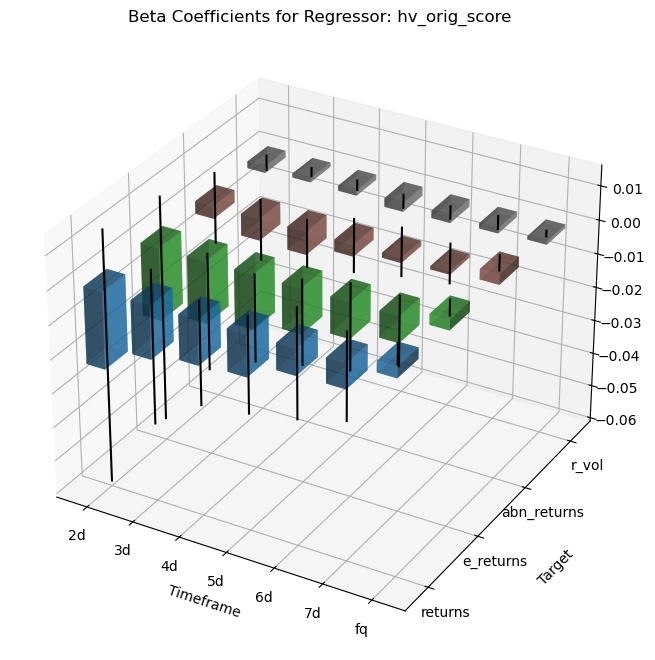

/tmp/ipykernel_15590/2620396234.py:412: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


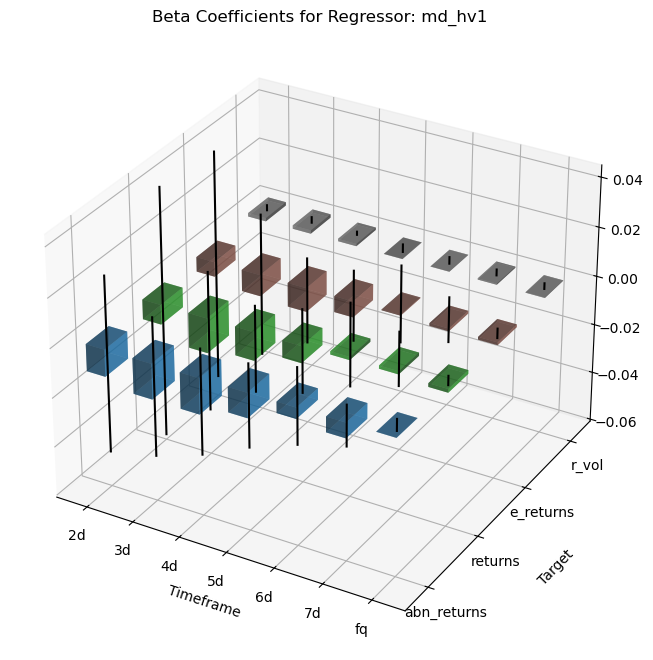

/tmp/ipykernel_15590/2620396234.py:412: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


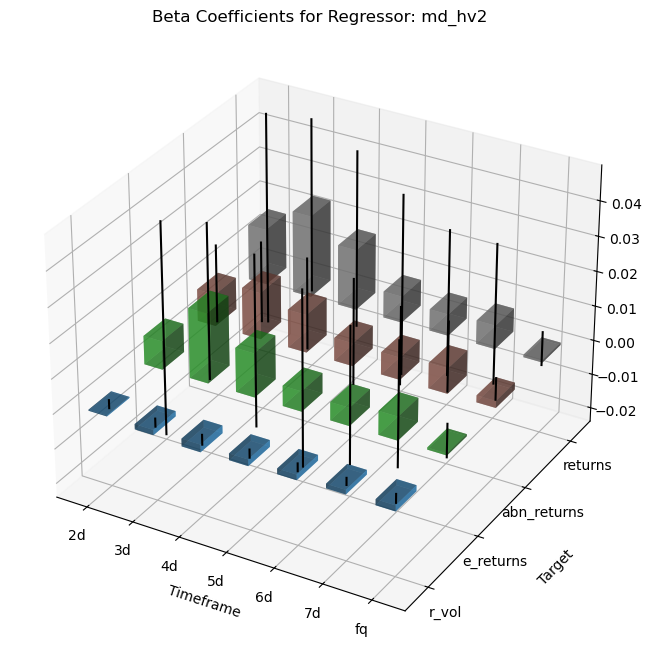

/tmp/ipykernel_15590/2620396234.py:412: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


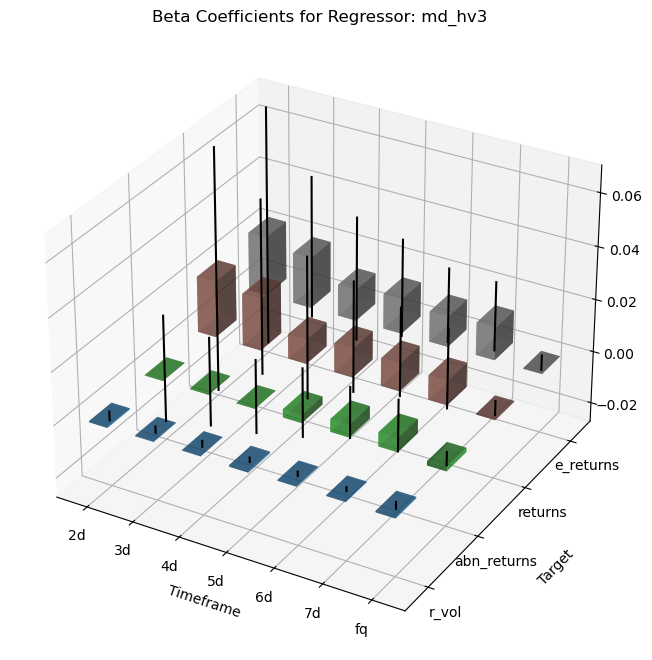

/tmp/ipykernel_15590/2620396234.py:412: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


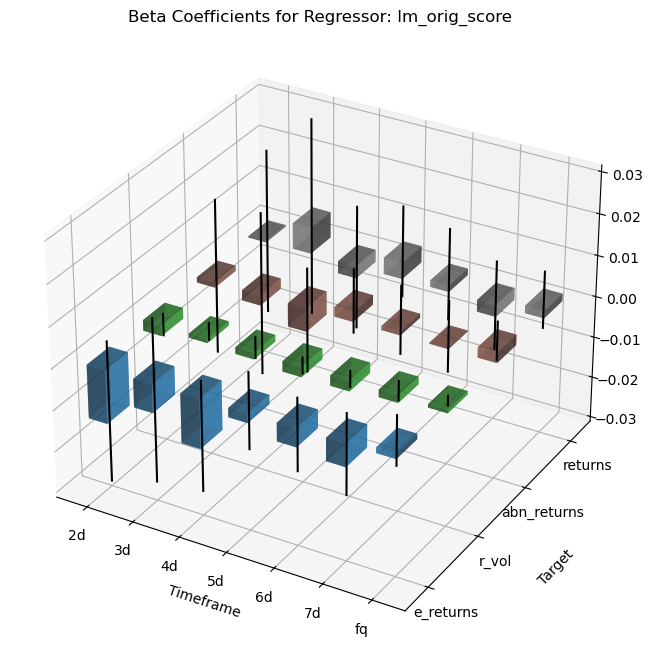

/tmp/ipykernel_15590/2620396234.py:412: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


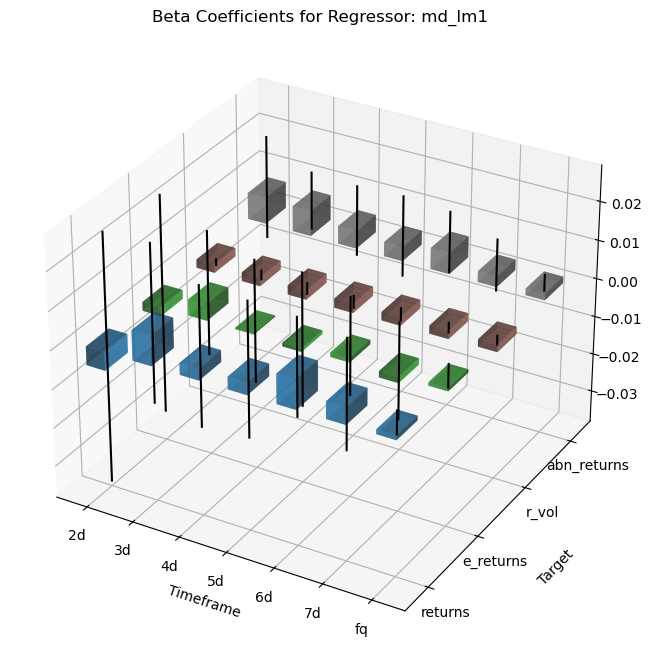

/tmp/ipykernel_15590/2620396234.py:412: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


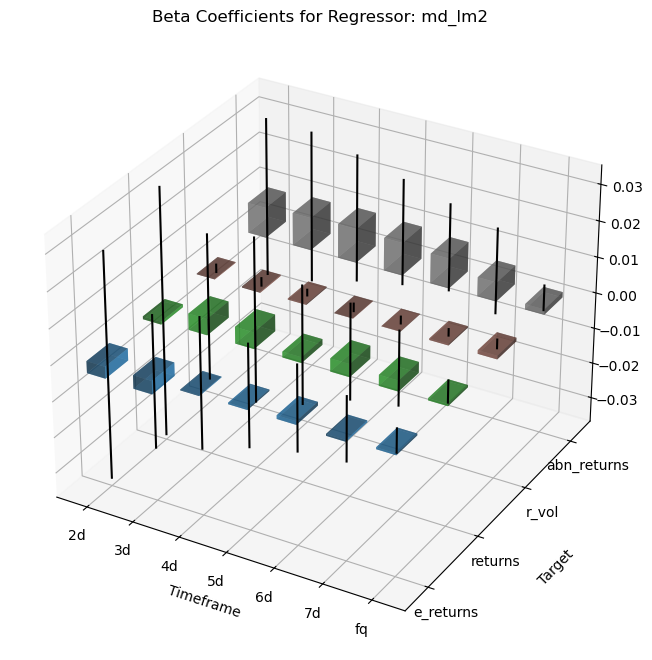

/tmp/ipykernel_15590/2620396234.py:412: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


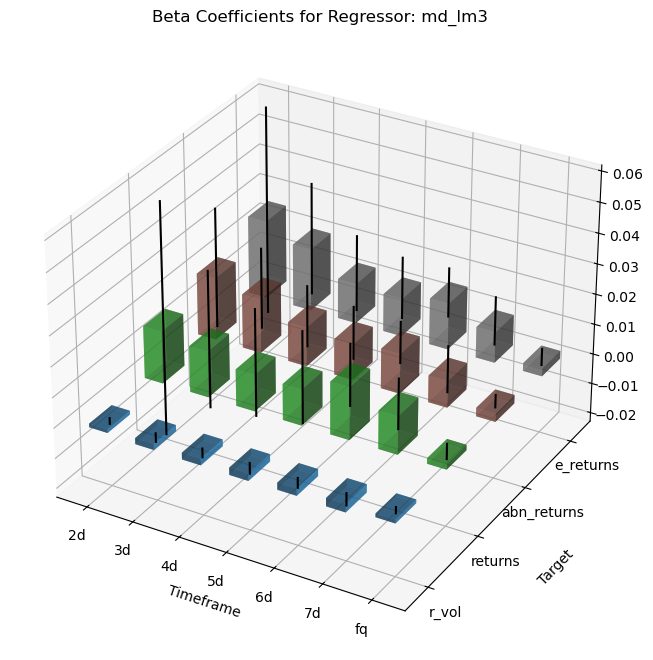

In [37]:
model.graph_3d()

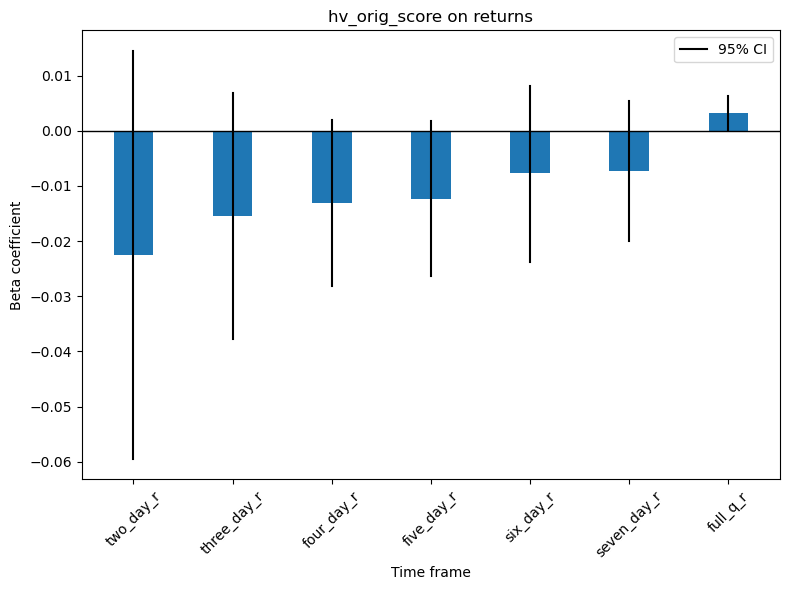

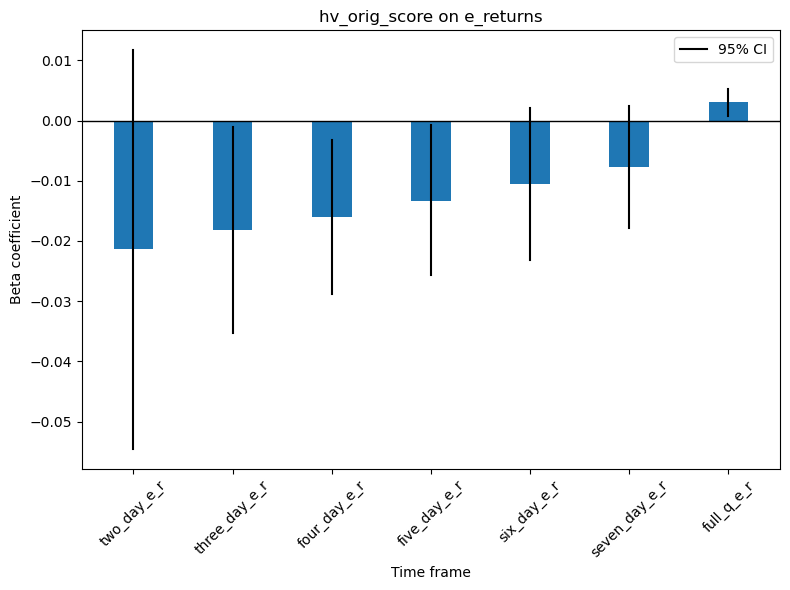

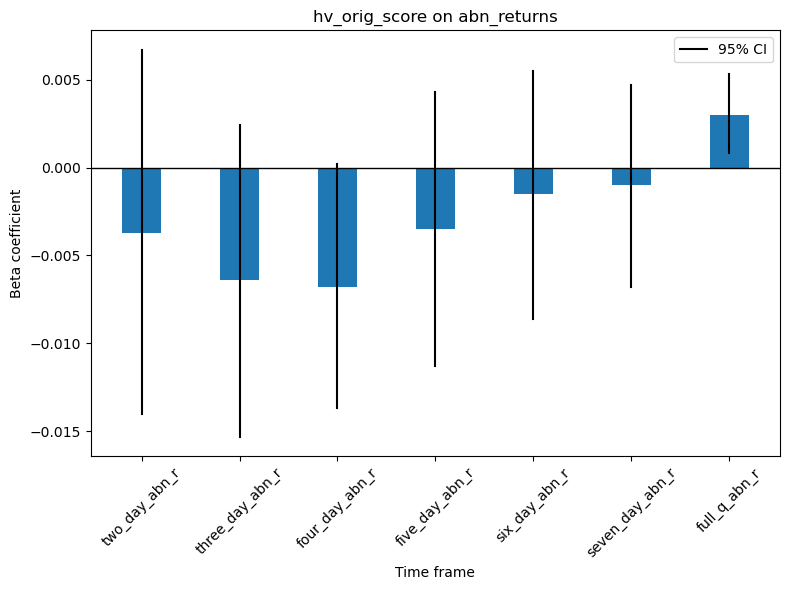

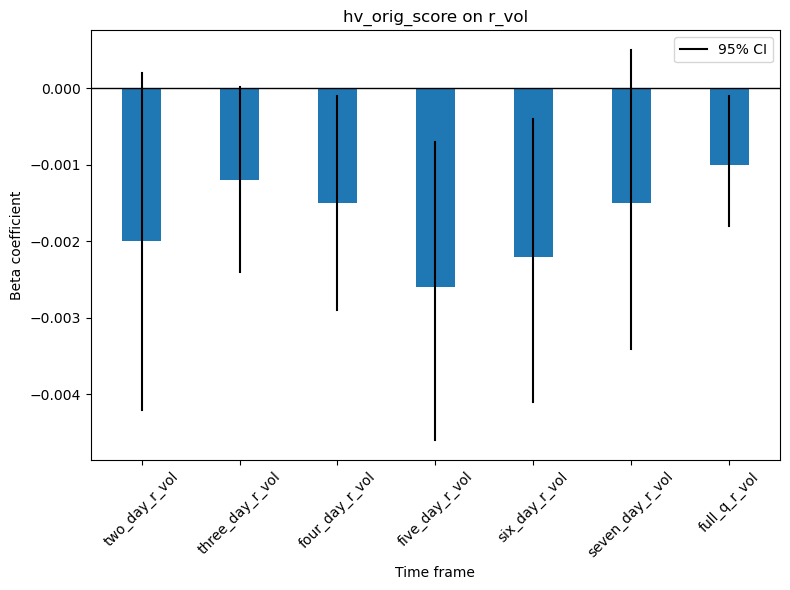

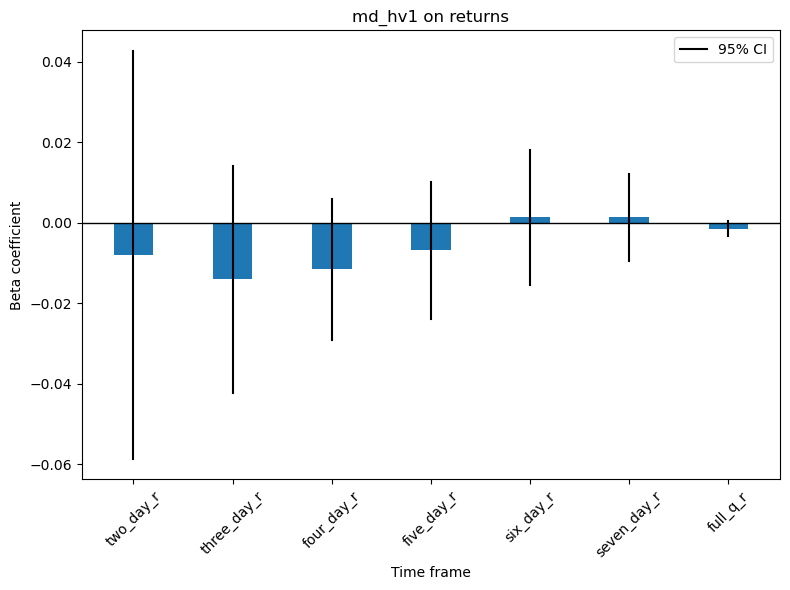

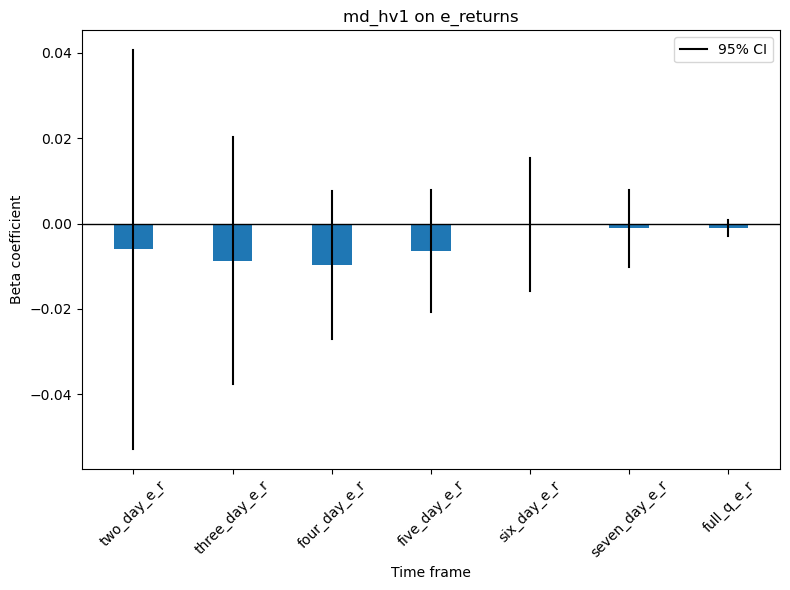

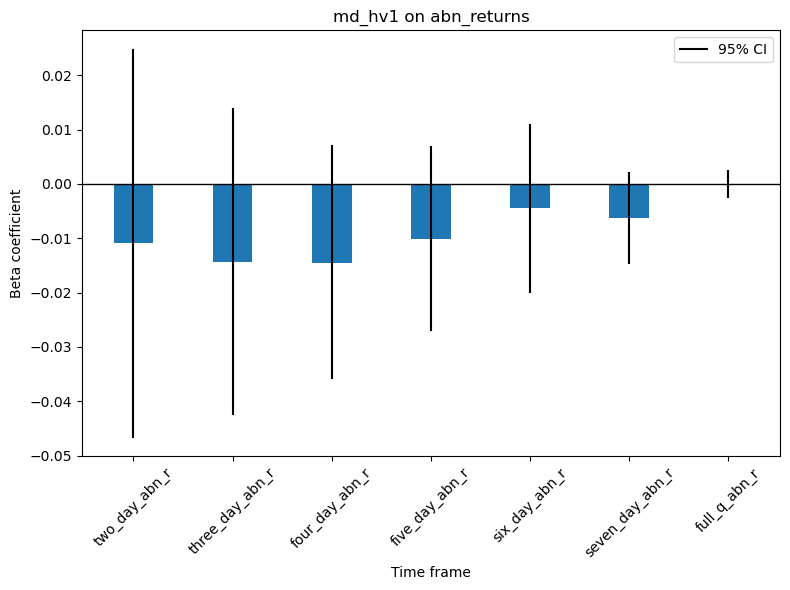

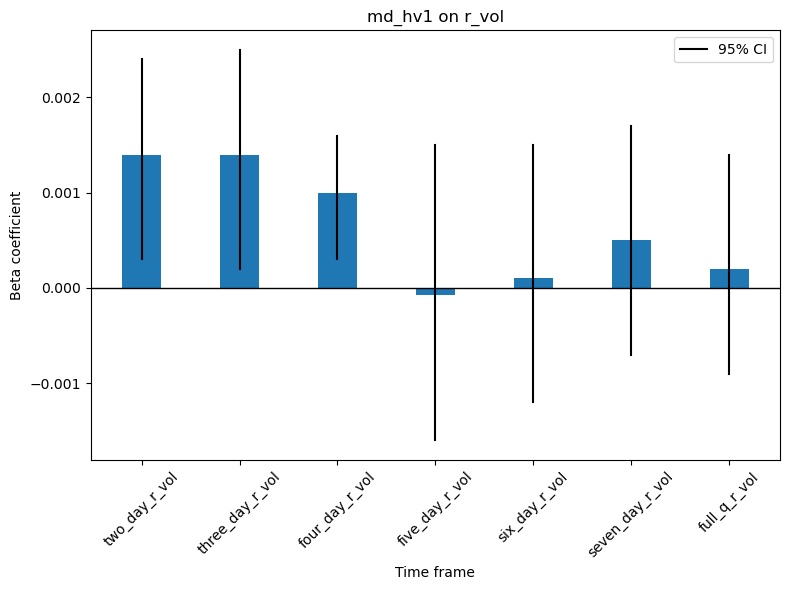

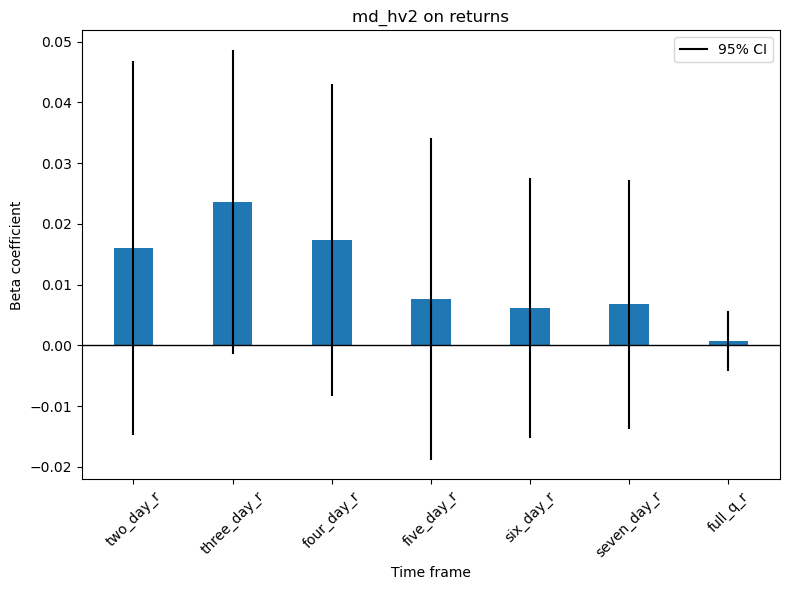

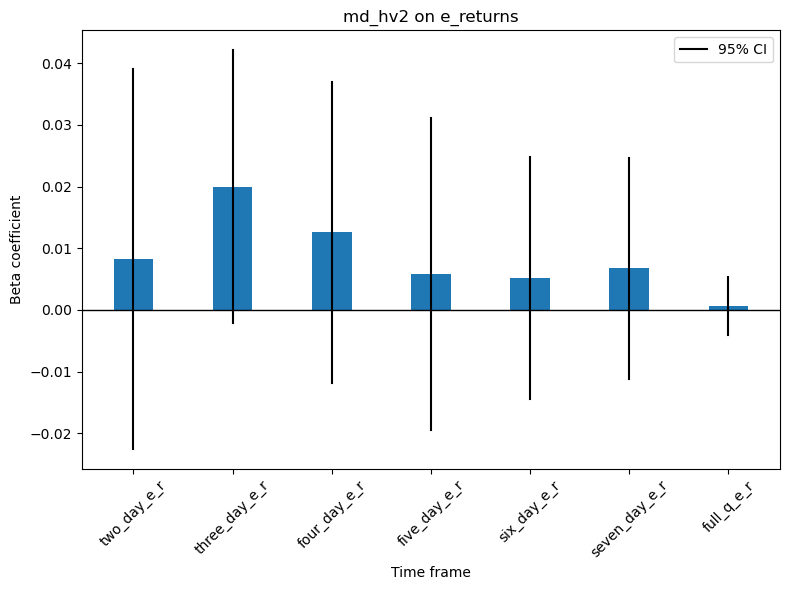

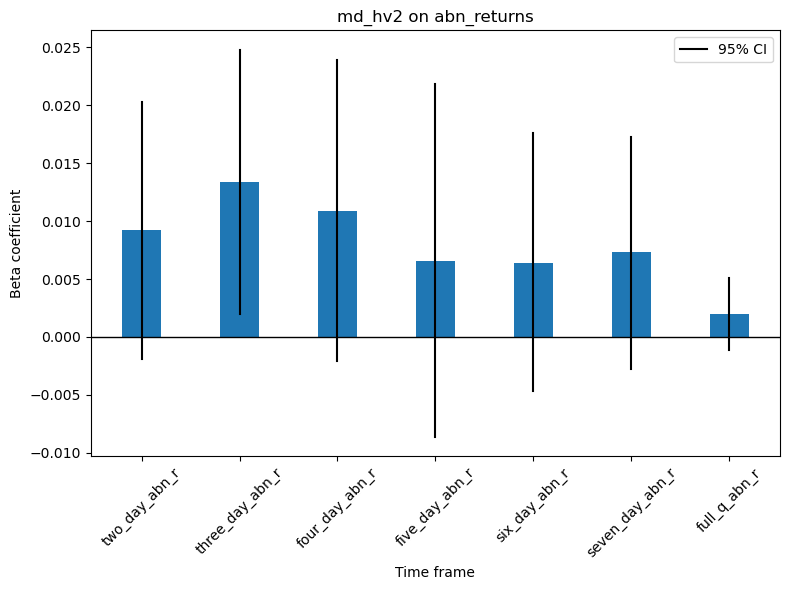

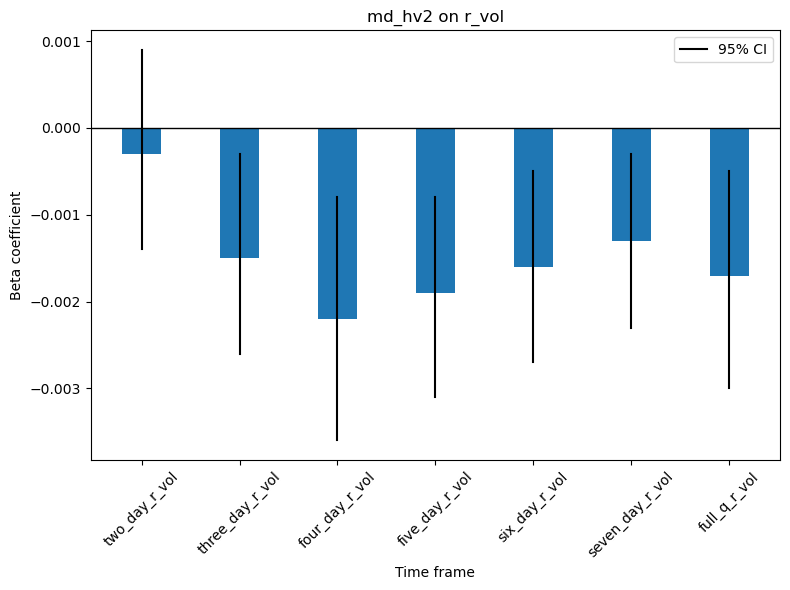

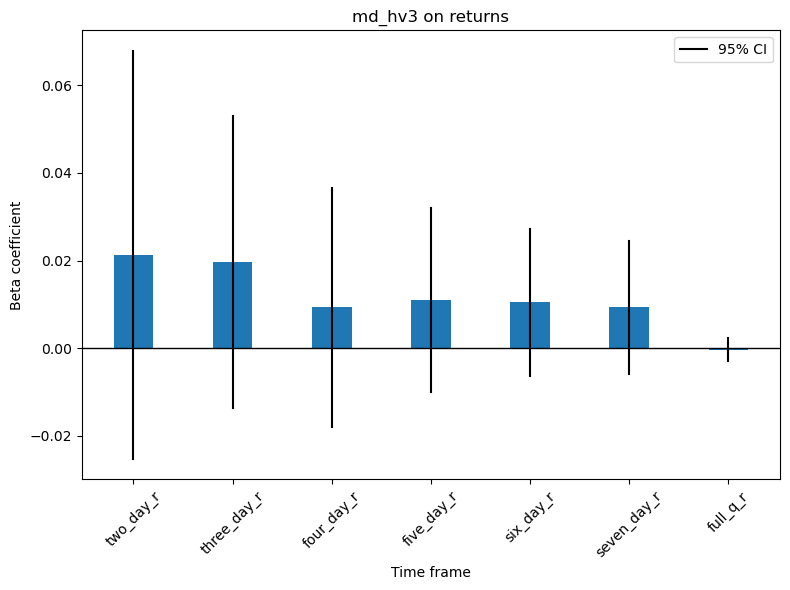

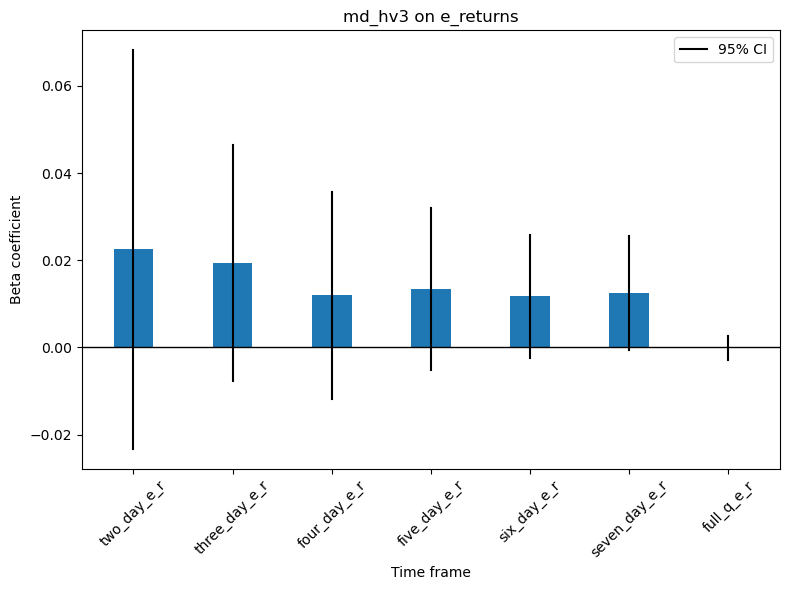

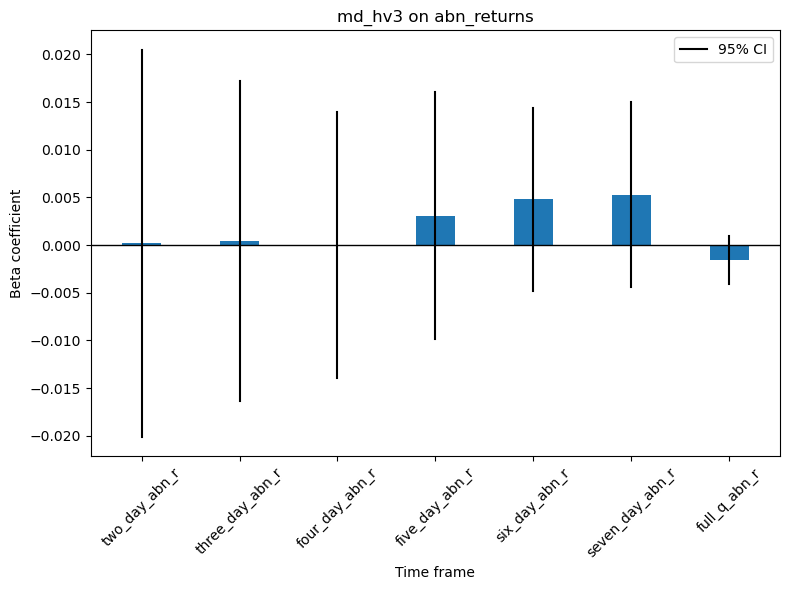

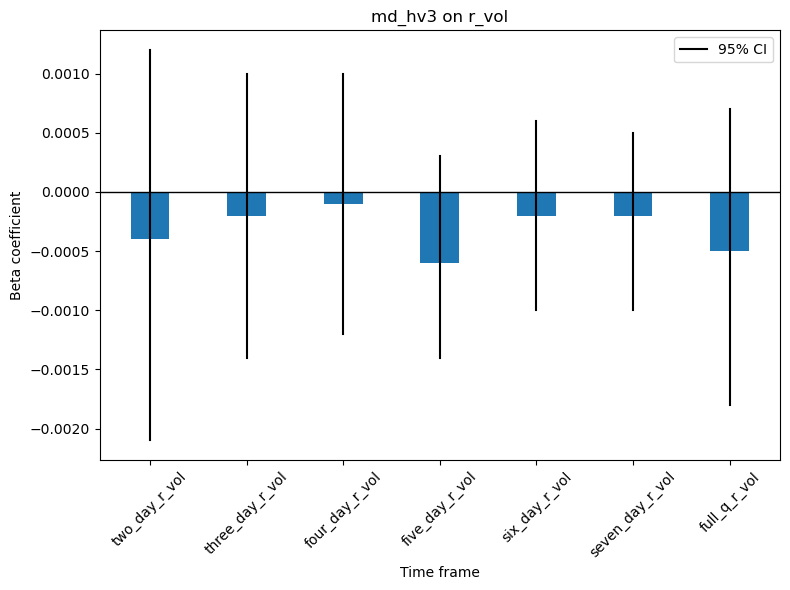

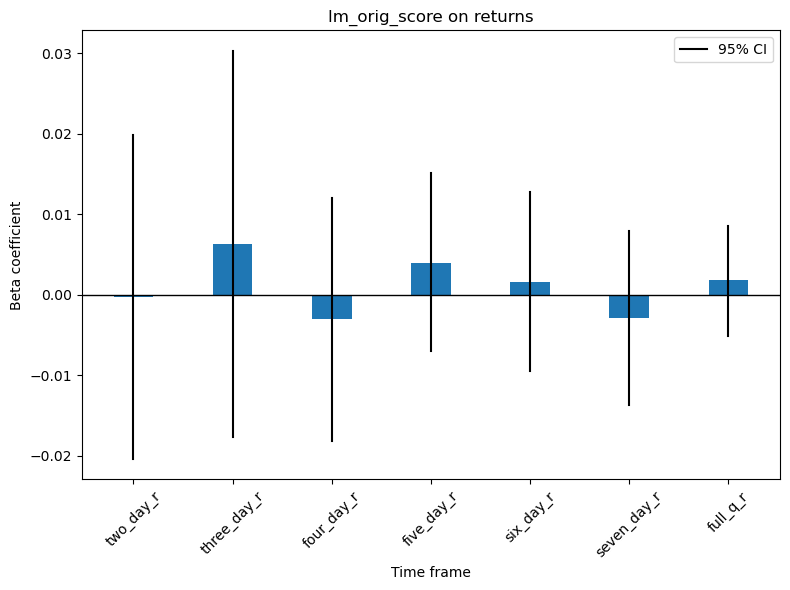

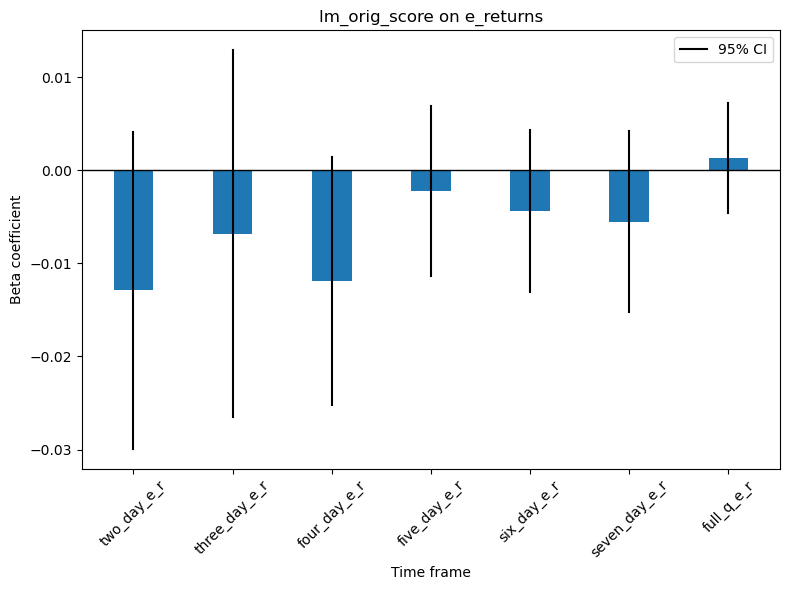

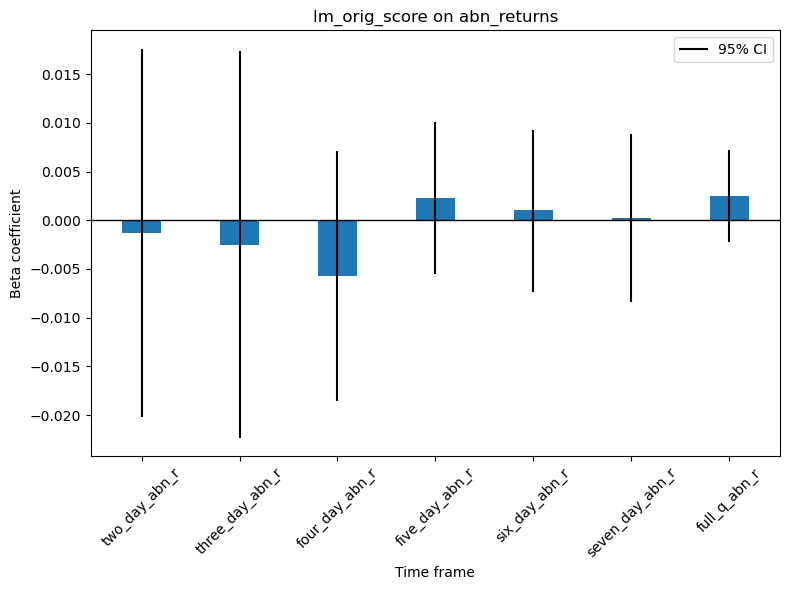

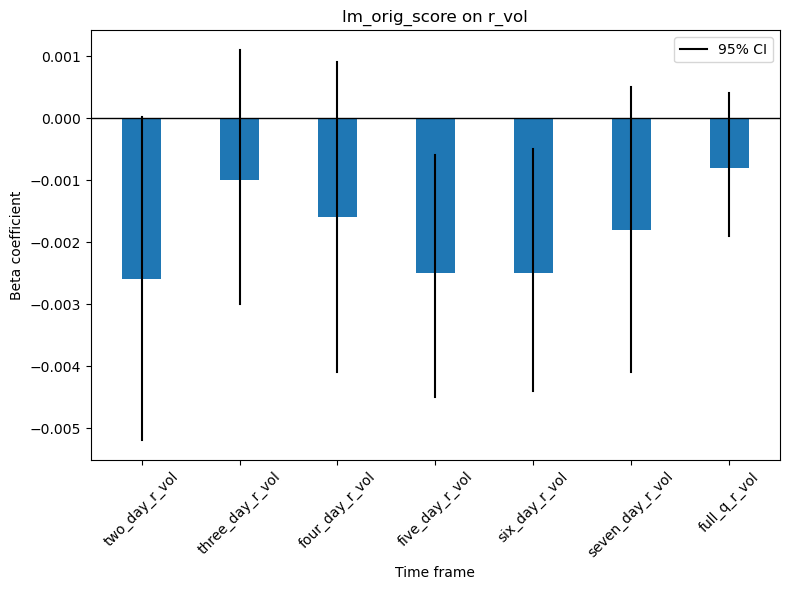

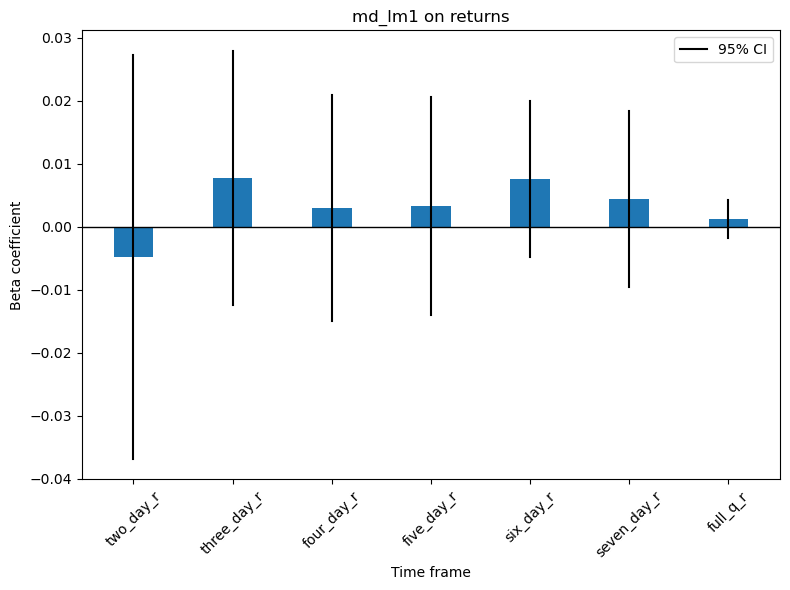

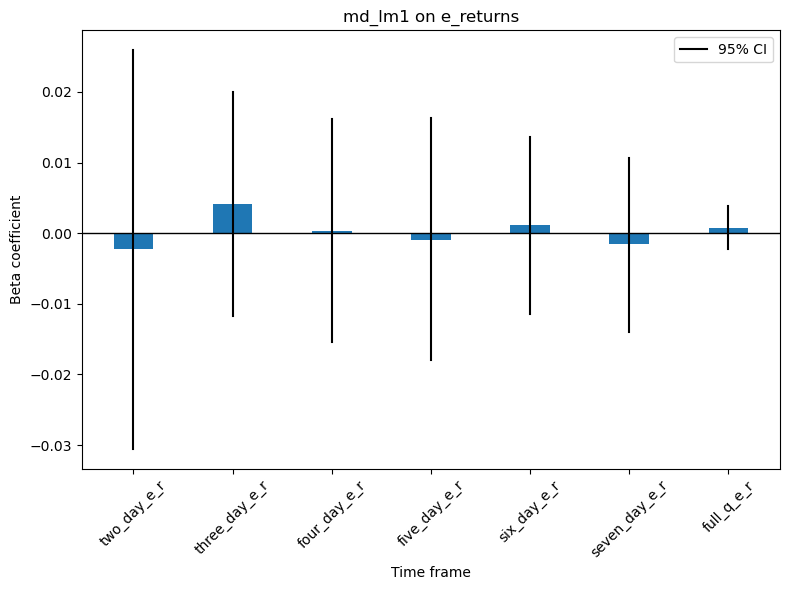

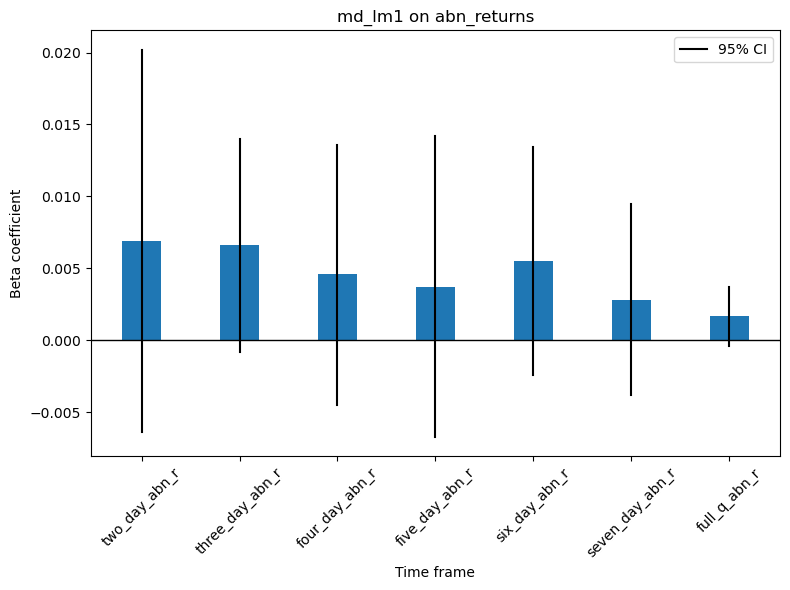

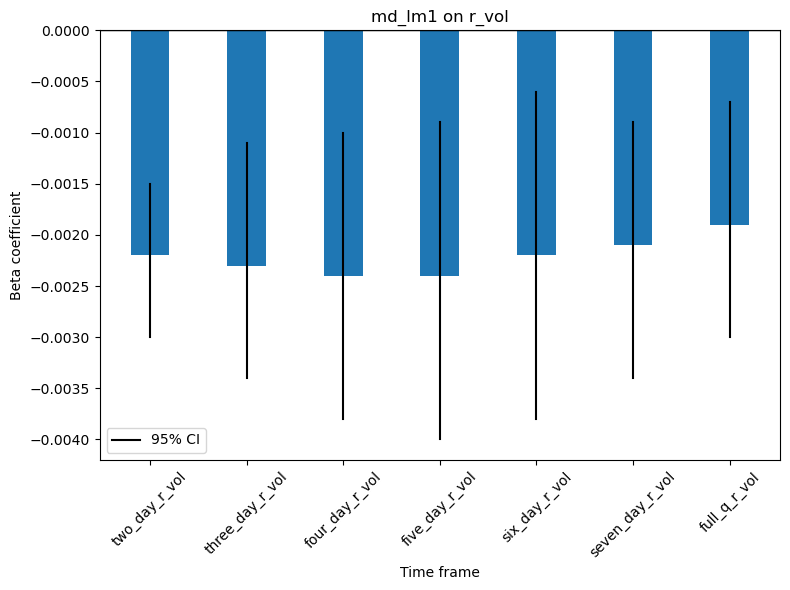

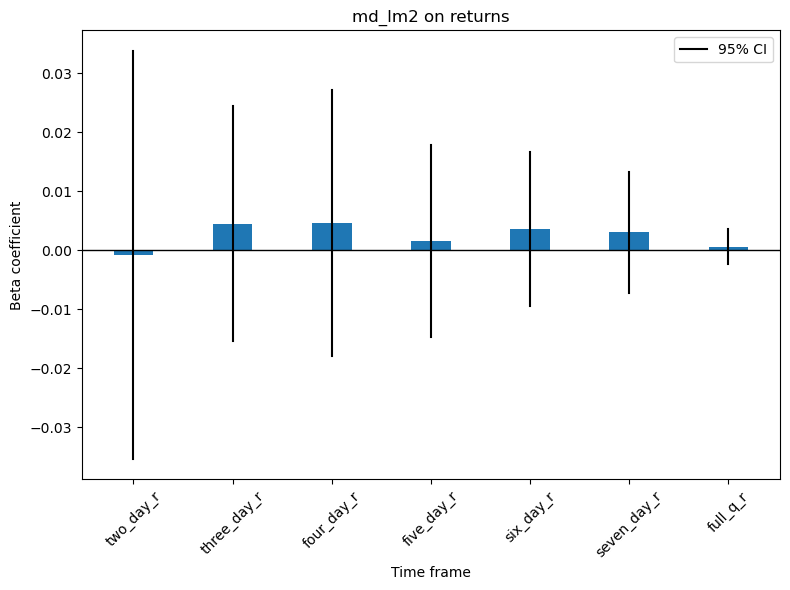

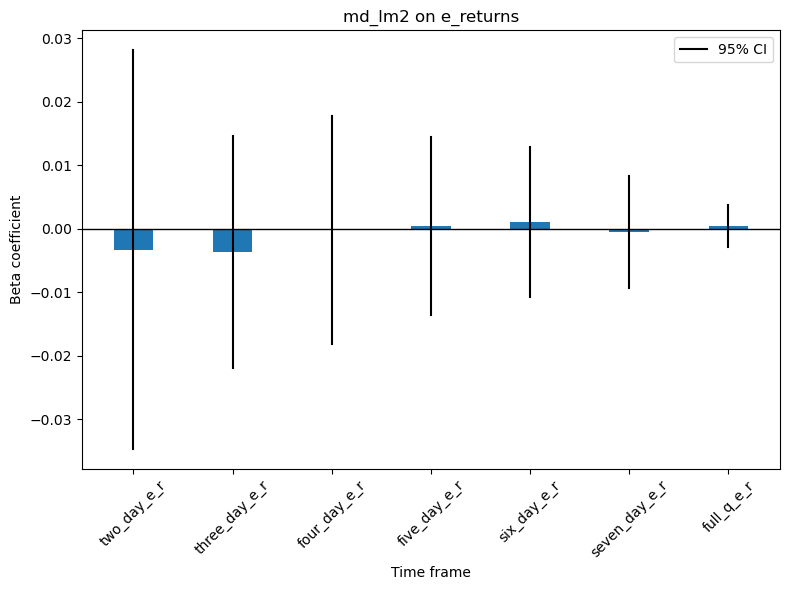

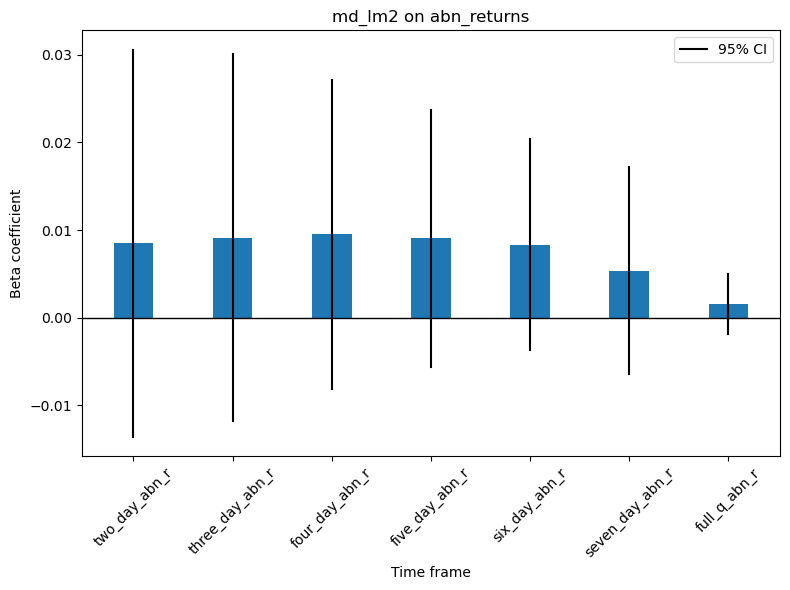

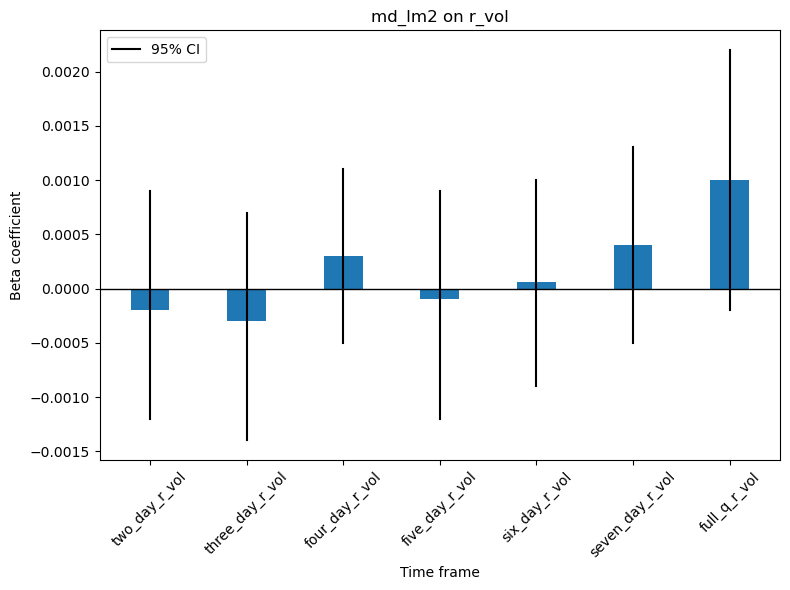

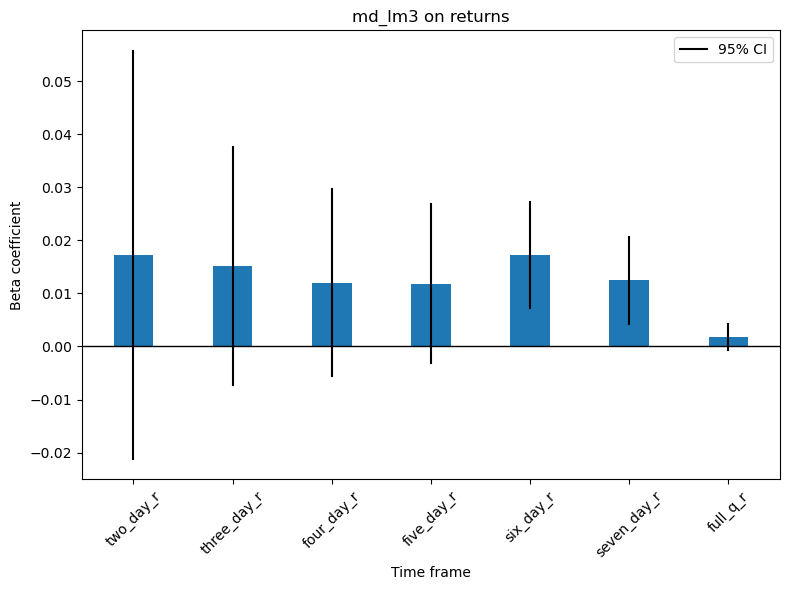

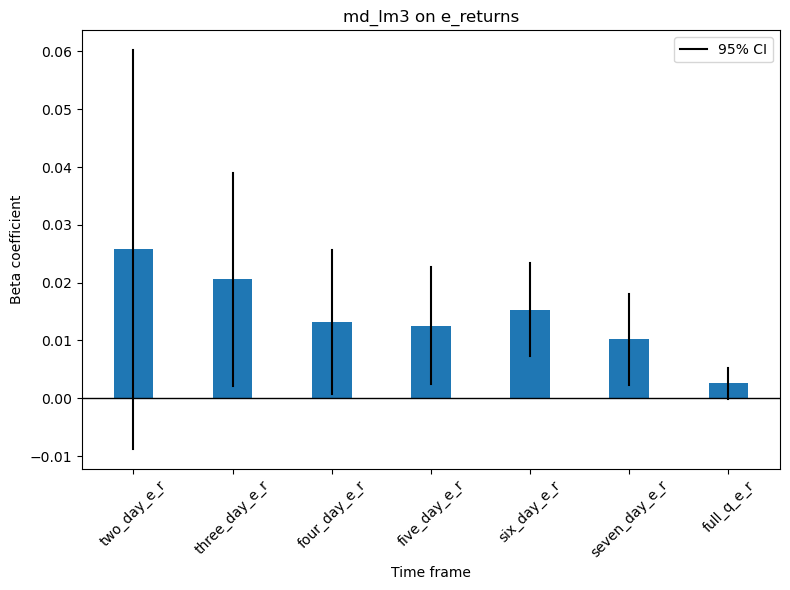

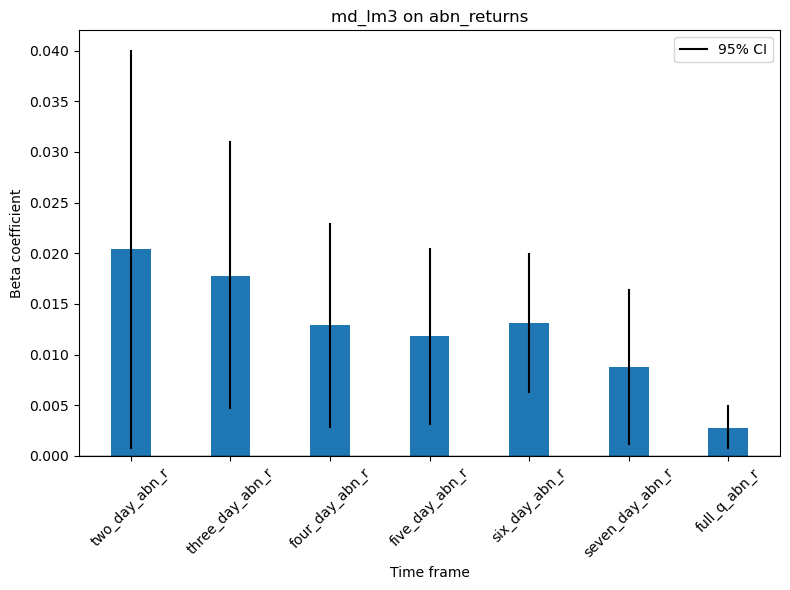

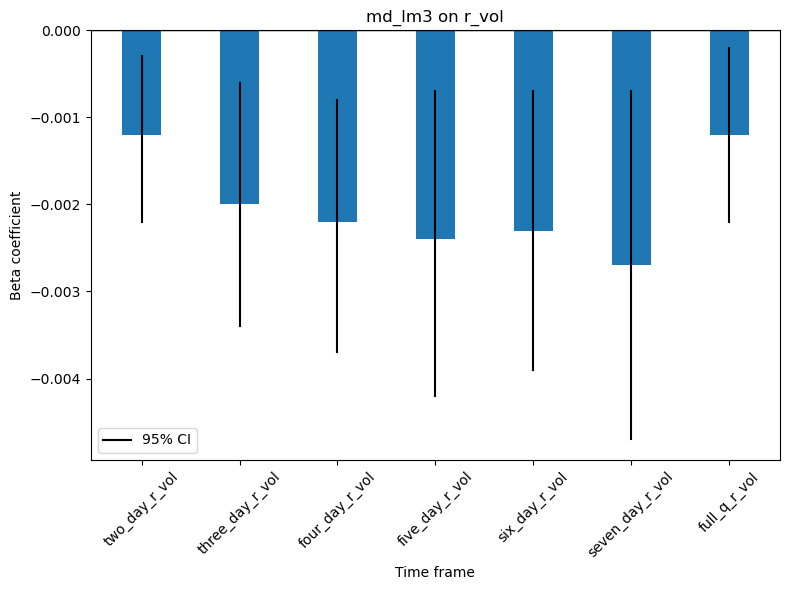

In [38]:
model.plot_all_params()